# Objetivos : 
## -> Encontrar o perfil das incorporados, empreiteiras e vendedoras que fizeram mais produziram.
## ->Definir os tipos de emprendimentos(quantidade de incorporadoras,de vendedoras e de construtoras, tipo de sistema financeiro,agente financiador)
## -> Criar um modelo de precificação para os empreendimentos e um modelo de precificação para os apartamentos

In [56]:
import pandas as pd
import seaborn as sns
from IPython.display import display
from PIL import Image

In [57]:
#função para criar um df com a relação de empreendimentos por classe.
def cria_df(dataframe,column) :
    classes=df.groupby(column)[[column]].count()

    freq = classes[column].values
    classes= classes[column].index
    dic = {column:classes,'freq':freq}
    return dic

In [58]:
df = pd.read_csv('LANRES_85_13_RMSP_CEM.csv',delimiter=";",low_memory=False)



# Variáveis de interesse 

# "PC_EMP_ATU" - Preço total de venda do empreendimento

In [61]:
target = "PC_EMP_ATU"
# trocando a ',' por '.' .
df["PC_EMP_ATU"] = df["PC_EMP_ATU"].str.replace(',', '.')
# convertendo a variável para float.
df["PC_EMP_ATU"]=df["PC_EMP_ATU"].astype(float);


<AxesSubplot:xlabel='PC_EMP_ATU', ylabel='Count'>

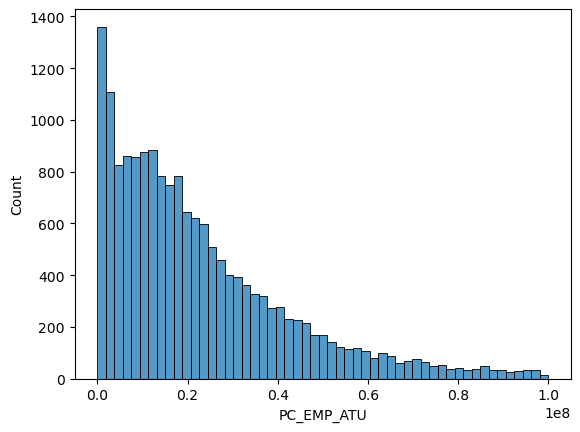

In [62]:
 sns.histplot(data=df, x=df["PC_EMP_ATU"])

In [63]:
 #seaborn.histplot(data=None, *, x=None, y=None, hue=None, weights=None, stat='count', bins='auto', binwidth=None, binrange=None, discrete=None, cumulative=False, common_bins=True, common_norm=True, multiple='layer', element='bars', fill=True, shrink=1, kde=False, kde_kws=None, line_kws=None, thresh=0, pthresh=None, pmax=None, cbar=False, cbar_ax=None, cbar_kws=None, palette=None, hue_order=None, hue_norm=None, color=None, log_scale=None, legend=True, ax=None, **kwargs)

In [64]:
#retirada dos empreendimentos com valor igual a zero.
df = df[df[target]>0]

<AxesSubplot:xlabel='PC_EMP_ATU', ylabel='Count'>

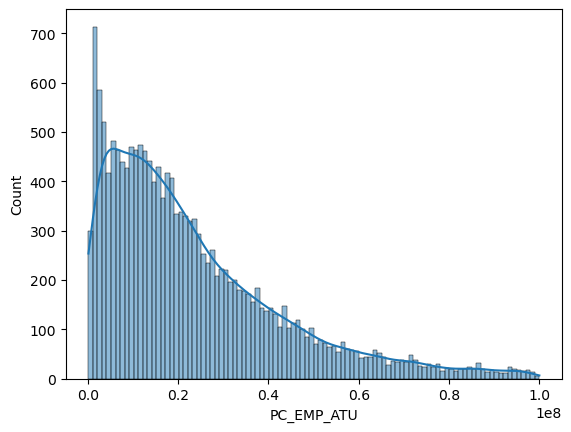

In [65]:
sns.histplot(x = df[target],kde = True,bins = 100)

In [66]:
# medidas estatíticas
df[target].describe()



count    1.641800e+04
mean     2.338335e+07
std      1.984019e+07
min      1.562210e+05
25%      8.576854e+06
50%      1.798174e+07
75%      3.264853e+07
max      9.998392e+07
Name: PC_EMP_ATU, dtype: float64

<AxesSubplot:xlabel='PC_EMP_ATU'>

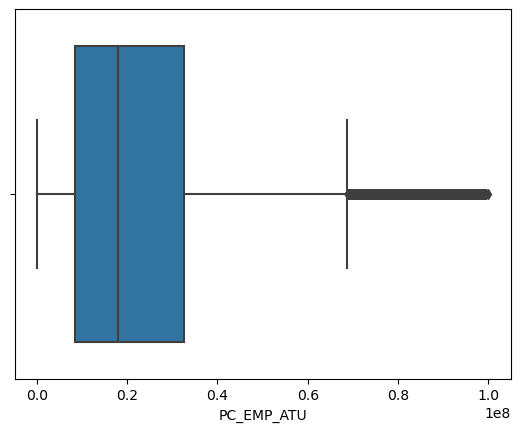

In [67]:
#encontrando outliers
sns.boxplot(x=df[target])

In [68]:
# limites superiores e inferiores e outliers
Q1 = df[target].quantile(0.25)
Q3 = df[target].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range.
ls = Q3+1.5*IQR
num_outliers = df[df[target]>ls][target].count()

print(ls)
print(num_outliers)

68756031.60499999
685


## 'AR_UT_UNID' : Área util da unidade em m²

In [69]:
# trocando a ',' por '.' .
df['AR_UT_UNID'] = df['AR_UT_UNID'].str.replace(',', '.')
# convertendo a variável para float.
df['AR_UT_UNID']=df['AR_UT_UNID'].astype(float);
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16418 entries, 0 to 16934
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          16418 non-null  int64  
 1   COD_EMP     16418 non-null  int64  
 2   TIPO_EMP    16418 non-null  object 
 3   MES_LAN     16418 non-null  object 
 4   ANO_LAN     16418 non-null  int64  
 5   DATA_ENT    16418 non-null  object 
 6   DIST        12812 non-null  object 
 7   SUBPREF     12812 non-null  object 
 8   MUNICIPIO   16418 non-null  object 
 9   ENDERECOCO  16418 non-null  object 
 10  LOGRADOURO  16418 non-null  object 
 11  TIT_VIA     4178 non-null   object 
 12  TIPO_VIA    16412 non-null  object 
 13  NUM         16418 non-null  object 
 14  CEP         16398 non-null  object 
 15  CEP_4DIG    16418 non-null  int64  
 16  NOME_EMP    16418 non-null  object 
 17  ZONA        16418 non-null  object 
 18  SETOR       16411 non-null  object 
 19  QUADRA      16417 non-nul

<AxesSubplot:xlabel='AR_UT_UNID', ylabel='Count'>

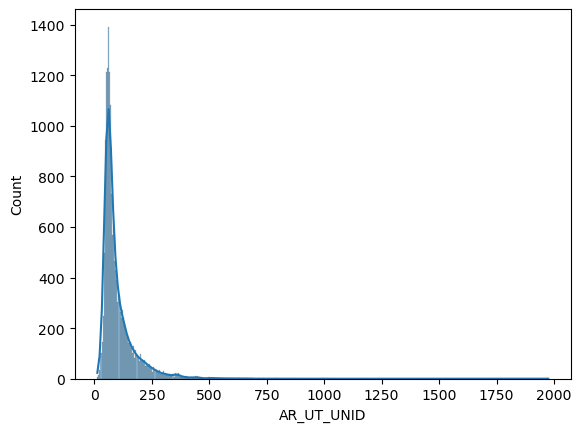

In [70]:
sns.histplot(data=df,x =df['AR_UT_UNID'],kde =True)

<AxesSubplot:xlabel='AR_UT_UNID'>

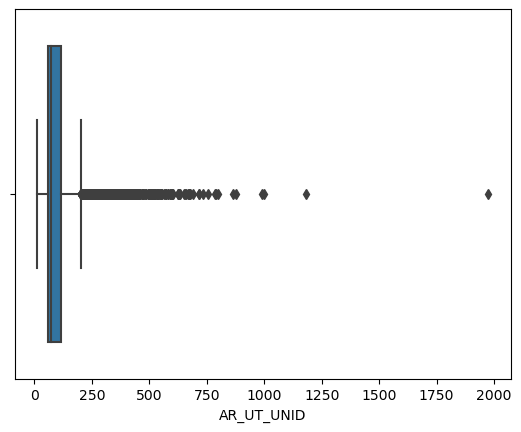

In [71]:
sns.boxplot(data=df,x =df['AR_UT_UNID'])

# Obs : será que existe uma unidade com área total  igual a  1975 m^2 ?




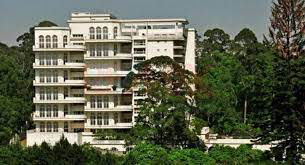

In [72]:
img = Image.open('unidade_outlier.jpeg')
img

In [73]:
#variaveis estatísticas
df['AR_UT_UNID'].describe()

count    16418.000000
mean       100.640813
std         76.468746
min         12.720000
25%         57.382500
50%         73.045000
75%        116.000000
max       1975.000000
Name: AR_UT_UNID, dtype: float64

 # 'pc_au_atu' : Preço por m² da área útil da unidade (em reais) em valores de dezembro de 2013 pelo IGP-DI

In [82]:
# trocando a ',' por '.' .
df['PC_AU_ATU'] = df['PC_AU_ATU'].str.replace(',', '.')
# convertendo a variável para float.
df['PC_AU_ATU']=df['PC_AU_ATU'].astype(float);

<AxesSubplot:xlabel='PC_AU_ATU', ylabel='Count'>

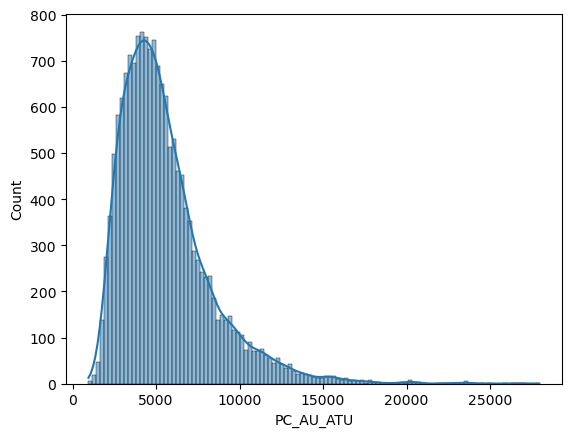

In [83]:
sns.histplot(data=df,x =df['PC_AU_ATU'],kde =True)

<AxesSubplot:xlabel='PC_AU_ATU'>

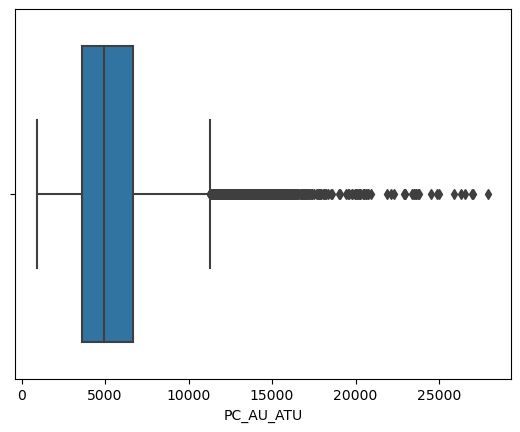

In [85]:
sns.boxplot(data=df,x =df['PC_AU_ATU'])

In [87]:
df['PC_AU_ATU'].describe()

count    16418.000000
mean      5544.808756
std       2773.841140
min        944.150000
25%       3640.912500
50%       4952.720000
75%       6698.292500
max      27953.390000
Name: PC_AU_ATU, dtype: float64

## 'UNIDAND' : Unidades por andar


In [90]:
# convertendo a variável para int.
df['UNIDAND']=df['UNIDAND'].astype(int);

<AxesSubplot:xlabel='UNIDAND', ylabel='Count'>

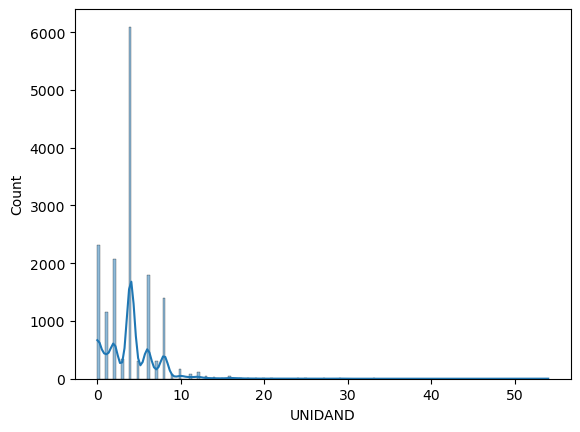

In [91]:
sns.histplot(data=df,x =df['UNIDAND'],kde =True)

<AxesSubplot:xlabel='UNIDAND'>

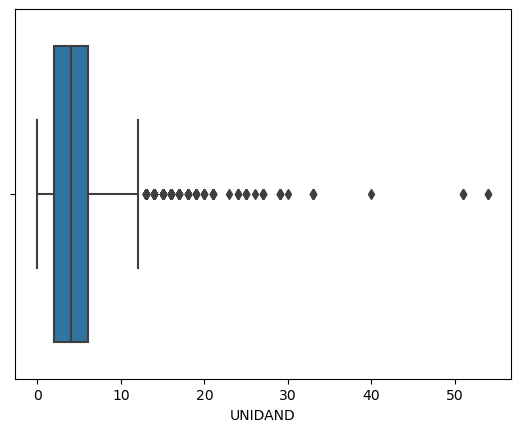

In [92]:
sns.boxplot(data=df,x =df['UNIDAND'])

In [93]:
df['UNIDAND'].describe()

count    16418.000000
mean         3.943477
std          3.158226
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max         54.000000
Name: UNIDAND, dtype: float64

# 'ANDARES' : Quantidade de andares do empreendimento 

In [94]:
# convertendo a variável para int.
df['ANDARES']=df['ANDARES'].astype(int);

<AxesSubplot:xlabel='ANDARES', ylabel='Count'>

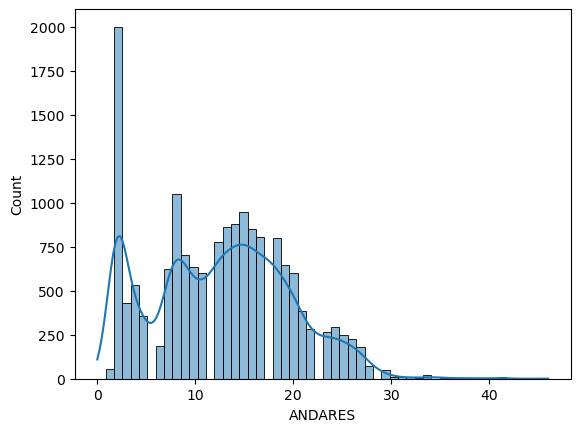

In [97]:
sns.histplot(data = df, x = df['ANDARES'], kde = True)

<AxesSubplot:xlabel='ANDARES'>

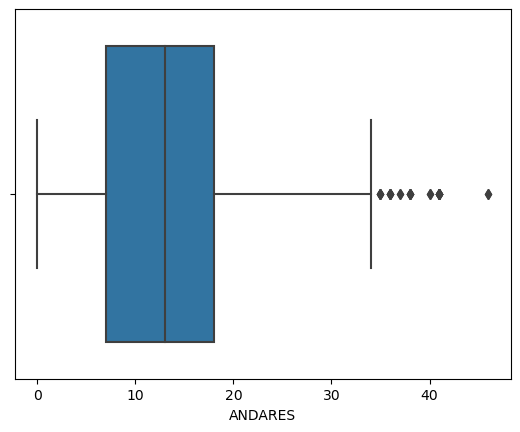

In [98]:
sns.boxplot(data = df, x = df['ANDARES'])

# 'TOTAL_UNIDADE' : número total de unidades no empreendimento.

In [101]:
#criando a variável 'TOTAL_UNIDADE'
df['TOTAL_UNIDADE']=df['UNIDAND']*df['ANDARES']

<AxesSubplot:xlabel='TOTAL_UNIDADE', ylabel='Count'>

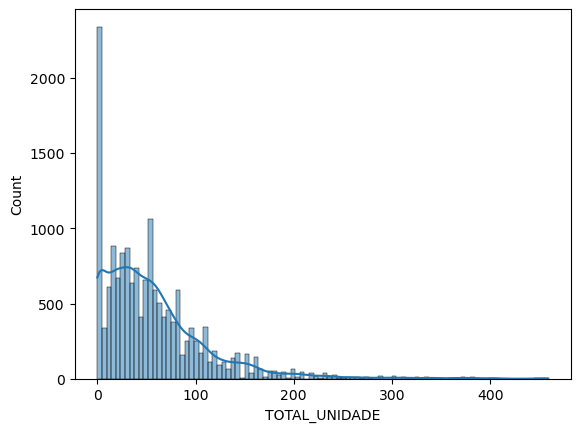

In [102]:
sns.histplot(data = df, x = df['TOTAL_UNIDADE'], kde = True)

<AxesSubplot:xlabel='TOTAL_UNIDADE'>

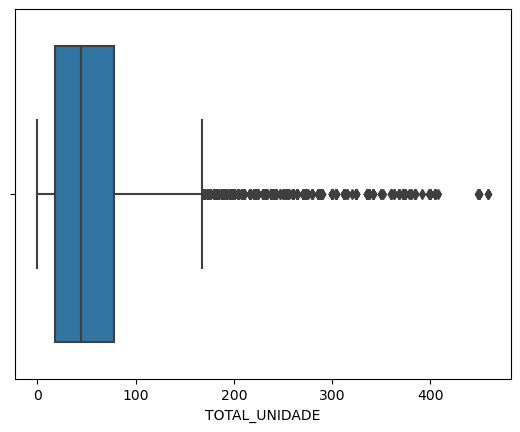

In [103]:
sns.boxplot(data = df, x = df['TOTAL_UNIDADE'])

In [105]:
df['TOTAL_UNIDADE'].describe()

count    16418.000000
mean        56.998721
std         55.479713
min          0.000000
25%         18.000000
50%         44.000000
75%         78.000000
max        459.000000
Name: TOTAL_UNIDADE, dtype: float64

In [116]:
#lista decrescente dos agentes financiadores.
df_agente = pd.DataFrame(cria_df(df,'AGENTE')).sort_values(by='freq',ascending=False)
df_agente.head(23)

,AGENTE,freq
79,SFH,4467
35,CEF,2256
30,Bradesco,292
77,SBPE,251
17,BRADESCO,184
58,Itau,155
24,Banespa,153
75,SANTANDER,106
87,Sudameris,101
55,ITAu,77


In [75]:
# Lista decrescente das incorporadoras
df_emp_icorp = pd.DataFrame(cria_df(df,'INCORPORAD')).sort_values(by='freq',ascending=False)
df_emp_icorp.head(23)

,INCORPORAD,freq
3029,Nao Informada,456
1919,Gafisa S/A,273
2759,MRV Engenharia e Participacoes S/A,177
1632,Encol S/A Eng¬ Comercio e Industria,132
1168,Construtora Tenda S/A,116
3615,Rossi Residencial S/A,111
518,Brookfield Incorporacoes S/A,102
2002,Goldfarb Comercio e Construcoes Ltda,97
3312,Plano Melhor Empreendimentos Ltda,92
3309,Plano & Plano Constr e Particip Ltda,77


In [76]:
# Lista decrescente das vendedoras.
df_emp_vend = pd.DataFrame(cria_df(df,'VENDEDORA')).sort_values(by='freq',ascending=False)
df_emp_vend.head(23)

,VENDEDORA,freq
1365,Lps Brasil - Consultoria de Imoveis S/A,1199
1201,Itaplan Imoveis Ltda,895
1358,Lopes Consultoria de Imoveis Ltda,849
897,Fernandez Mera Neg Imobiliarios Ltda,602
432,Coelho da Fonseca Empreend Imobil Ltda,558
107,Abyara Planejamento Imobiliario Ltda,457
1886,Roque & Seabra Empreend Imob Ltda,373
1064,Habitcasa Consultoria de Imoveis Ltda,302
2120,Triumpho & Assoc Consult de Imoveis Ltda,266
851,Exclusiva Mediadora Imobiliaria Ltda,225


In [77]:
# Lista decrescente das construtoras.
df_emp_constr = pd.DataFrame(cria_df(df,'CONSTRUTOR')).sort_values(by='freq',ascending=False)
df_emp_constr.head(23)

,CONSTRUTOR,freq
2145,Nao Informada,761
1398,Gafisa S/A,333
1945,MRV Engenharia e Participacoes S/A,177
2144,Nao Definida,165
2813,Tiberio Construcoes e Incorporacoes S/A,141
1198,Encol S/A Eng¬ Comercio e Industria,132
895,Construtora Tenda S/A,123
467,Company S/A,120
2523,Rossi Residencial S/A,118
1446,Goldfarb Comercio e Construcoes Ltda,117


In [78]:
# Lista decrescente das SIST_FINAN
df_emp_icorp = pd.DataFrame(cria_df(df,'SIST_FINAN')).sort_values(by='freq',ascending=False)
df_emp_icorp.head(23)

,SIST_FINAN,freq
2,Preco Fechado,15132
3,Preco de Custo,1279
0,Consorcio,4
4,Preco de custo,2
1,Perco Fechado,1


## Incorporadora Gafisa

In [79]:
df_Gafisa = df[df['INCORPORAD']=='Gafisa S/A']

In [80]:
df_Gafisa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 469 to 15199
Data columns (total 85 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          273 non-null    int64  
 1   COD_EMP     273 non-null    int64  
 2   TIPO_EMP    273 non-null    object 
 3   MES_LAN     273 non-null    object 
 4   ANO_LAN     273 non-null    int64  
 5   DATA_ENT    273 non-null    object 
 6   DIST        211 non-null    object 
 7   SUBPREF     211 non-null    object 
 8   MUNICIPIO   273 non-null    object 
 9   ENDERECOCO  273 non-null    object 
 10  LOGRADOURO  273 non-null    object 
 11  TIT_VIA     69 non-null     object 
 12  TIPO_VIA    273 non-null    object 
 13  NUM         273 non-null    object 
 14  CEP         273 non-null    object 
 15  CEP_4DIG    273 non-null    int64  
 16  NOME_EMP    273 non-null    object 
 17  ZONA        273 non-null    object 
 18  SETOR       273 non-null    object 
 19  QUADRA      273 non-null 

<AxesSubplot:xlabel='AR_UT_UNID'>

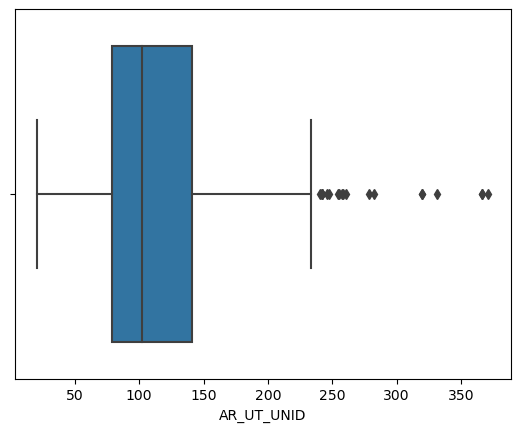

In [115]:
#histograma para valores do empreendimento
sns.boxplot(data=df_Gafisa,x =df_Gafisa['AR_UT_UNID'])

In [ ]:
# medidas estatísticas do valor do empreendimento
df_Gafisa[target].describe()

In [ ]:
#numero de outliers de valores de empreendimentos da incorporadora Gafisa
num_outliers = df_Gafisa[df_Gafisa[target]>ls][target].count()

print(ls)
print(num_outliers)
print(num_outliers/273)

In [ ]:
#histograma para valores da área útil do empreendimento em m2
sns.histplot(x = df_Gafisa[target],kde = True,bins = 10)


# Conclusão: 
## -> a média dos valores dos empreendimentos da Gafisa(40.106.940) está acima da média geral dos empreendimentos (23.383.350)
## -> 12,8 % dos valores dos empreendimentos da Gafisa são considerados outliers